# 9.1 开始使用xlwings

### 1. 将Excel用作数据查看器

In [1]:
# 导入本章会用到的包
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

np.random.randn() 函数接受一个或多个整数参数，用于指定输出数组的形状。<br>
这些参数以元组的形式传入，例如 (m, n) 表示生成一个 m 行 n 列的二维数组。

In [2]:
# 创建一个基于伪随机数的DataFrame，它有足够多的行使得只有首尾几行会被显示
df = pd.DataFrame(data=np.random.randn(100, 5), 
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,1.016925,1.039055,-0.862579,-1.006096,-0.327847
1,0.711557,-0.107396,0.440524,0.483805,-0.376018
2,-0.946859,-1.824079,1.351435,-0.002271,0.700822
3,0.024586,-2.527213,0.024448,0.048422,1.228380
4,-0.078175,0.087660,1.832819,-2.414008,1.192027
...,...,...,...,...,...
95,0.138159,0.743616,-0.540641,1.013577,1.469800
96,-0.633182,0.443399,1.142337,-0.397931,0.193842
97,-0.639318,-1.034207,-1.062594,-0.268926,-1.206813
98,0.022682,-1.082083,-0.633174,-0.455662,0.903807


view()函数可以接受所有常见的Python对象，包括数字、字符串、列表、字典、元组、NumPy数组和pandas DataFrame<br>
默认情况下，它会打开一个新的工作簿，然后将对象粘贴到第一张工作表的A1单元格<br>
它甚至会通过Excel的自动适应功能来调整列宽<br>
不必每次都打开一个新的工作簿，可以通过view()函数提供一个xlwings sheet对象作为第二个参数来重复利用同一个工作簿文件：xw.view(df, mysheet)

In [3]:
# 在Excel中查看DataFrame
xw.view(df)

### 2. Excel对象模型

app<em>【应用程序实例】</em>包含多个book<em>【工作簿】</em>的集合<br>
book<em>【工作簿】</em>包含多个sheet<em>【工作表】</em>的集合<br>
通过sheet<em>【工作表】</em>可以访问range对象和charts等集合<br>
range包含一个或多个连续的单元格作为其元素

<table align="left">
    <tr>
        <th>命令</th>
        <th>描述</th>
    </tr>
    <tr>
        <td>xw.Book()</td>
        <td>返回代表活动的Excel实例中新的Excel工作簿的book对象;<br>
           如果没有活动的Excel实例，则会启动一个
        </td>
    </tr>
    <tr>
        <td>xw.Book("Book1")</td>
        <td>返回表示未保存的名为Book1（名称中不含文件扩展名）的工作簿的book对象</td>
    </tr>
    <tr>
        <td>xw.Book("Book1.xlsx")</td>
        <td>返回代表之前保存过的名为Book1.xlsx（名称中包含文件扩展名）的工作簿对象。<br>
           该文件必须是已打开的，或者位于当前的工作目录
        </td>
    </tr>
    <tr>
        <td>xw.Book(r"C:\path\Book1.xlsx")</td>
        <td>返回代表之前保存过的工作簿（完整文件路径）的对象。该文件可以是打开的也可以是关闭的。<br>
           路径字符串开头的r会将字符串转化为原始字符串，以便路径中的反斜杠（\）在Windows中按照字面进行解释
        </td>
    </tr>
    <tr>
        <td>xw.books.active</td>
        <td>返回代表活动的Excel实例中活动的工作簿的book对象</td>
    </tr>
</table>

In [4]:
# 创建一个新的空工作簿并打印其名称
book = xw.Book(r"xl/Book2.xlsx")
book.name

'Book2.xlsx'

In [5]:
# 访问工作表集合
book.sheets

Sheets([<Sheet [Book2.xlsx]Sheet1>])

In [6]:
# 通过索引或名称获取工作表对象
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [7]:
sheet1.range("A1")

<Range [Book2.xlsx]Sheet1!$A$1>

range方法是用来操作Excel单元格区域的
<table align="left">
    <tr>
        <th>引用</th>
        <th>描述</th>
    </tr>
    <tr>
        <td>"A1"</td>
        <td>单个单元格</td>
    </tr>
    <tr>
        <td>"A1:B2"</td>
        <td width="200px">从A1到B2的单元格区域</td>
    </tr>
    <tr>
        <td>"A:A"</td>
        <td>A列</td>
    </tr>
    <tr>
        <td>"A:B"</td>
        <td>A列到B列</td>
    </tr>
    <tr>
        <td>"1:1"</td>
        <td>1行</td>
    </tr>
    <tr>
        <td>"1:2"</td>
        <td>1行到2行</td>
    </tr>
</table>

In [8]:
# 最常见的任务：写入值
sheet1.range("A1").value = [[1, 2], 
                            [3, 4]]
sheet1.range("A4").value = "Hello！"

In [9]:
# 读取值
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [10]:
sheet1.range("A4").value

'Hello！'

In [11]:
# 索引
sheet1.range("A1:B2")[0, 0]

<Range [Book2.xlsx]Sheet1!$A$1>

In [12]:
# 切片
sheet1.range("A1:B2")[:, 1]

<Range [Book2.xlsx]Sheet1!$B$1:$B$2>

In [13]:
# 单个单元格：A1表示法
sheet1["A1"]

<Range [Book2.xlsx]Sheet1!$A$1>

In [14]:
# 多个单元格：A1表示法
sheet1["A1:B2"]

<Range [Book2.xlsx]Sheet1!$A$1:$B$2>

In [15]:
# 单个单元格：索引
sheet1[0, 0]

<Range [Book2.xlsx]Sheet1!$A$1>

In [16]:
# 多个单元格：切片
sheet1[:2, :2]

<Range [Book2.xlsx]Sheet1!$A$1:$B$2>

<b>索引从0开始；range对象从1开始</b>

In [17]:
# 通过sheet索引访问D10
sheet1[9, 3]

<Range [Book2.xlsx]Sheet1!$D$10>

In [18]:
# 通过range对象访问D10
sheet1.range((10, 4))

<Range [Book2.xlsx]Sheet1!$D$10>

In [19]:
# 通过sheet切片访问D10:F11
sheet1[9:11, 3:6]

<Range [Book2.xlsx]Sheet1!$D$10:$F$11>

In [20]:
# 通过range对象访问D10：F11
sheet1.range((10, 4), (11, 6))

<Range [Book2.xlsx]Sheet1!$D$10:$F$11>

In [21]:
# 从range()对象【即(sheet["A1"])】自底向上得到app对象
sheet1["A1"].sheet.book.app

<Excel App 2488>

xw.name：返回 Excel 应用程序的简短名称（通常是 "Microsoft Excel"）。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;示例输出："Microsoft Excel"<br>

xw.fullname：返回 Excel 应用程序的完整名称（包含版本信息，如 "Microsoft Excel 365"）。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;示例输出："Microsoft Excel 365"

In [22]:
# 从打开的工作簿中获取app对象，并创建一个额外的隐藏的app实例
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [23]:
# 通过列表推导式列出各实例中打开的工作簿名称
[book.name for book in visible_app.books]

['工作簿1', 'Book2.xlsx']

In [24]:
[book.name for book in invisible_app.books]

['工作簿2']

In [25]:
# app的键待见进程ID（PID）
xw.apps.keys()

[8544, 2488]

In [26]:
# 也可以通过pid属性访问
xw.apps.active.pid

8544

In [27]:
# 处理隐藏的Excel实例中的工作簿
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Create by an invisible app."

In [28]:
# 将这个Excel工作簿保存在xl目录中
invisible_book.save("xl/invisible.xlsx")

In [29]:
# 退出隐藏的Excel实例
invisible_app.quit()

<table>
    <tr>
        <td>命令</td>
        <td>描述</td>
    </tr>
    <tr>
        <td>myapp.books.add()</td>
        <td>在myapp引用的Excel实例中创建一个新的Excel工作簿并返回对应的book对象</td>
    </tr>
    <tr>
        <td>myapp.books.open(r"C:\path\Book.xlsx")</td>
        <td>如果对应的book对象已打开就直接返回该对象，否则应该首先在myapp引用的Excel实例中打开该工作簿。<br>
            字符串开头的r会将字符串转化为原始字符串，以便路径中的反斜杠（\）在Windows中按照字面进行解释
        </td>
    </tr>
    <tr>
        <td>myapp.books["Book1.xlsx"]</td>
        <td>如果对应的工作簿已打开就直接返回该book对象。如果未打开会引发KeyError错误。<br>
            一定要使用文件名而非完整路径。如果想知道一个工作簿是否已经在Excel中打开，就可以使用该命令
        </td>
    </tr>
</table>

# 9.2 转换器、选项和集合

### 9.2.1 处理DataFrame

In [30]:
data = [["Mark", 55, "Italy", 4.5, "Europe"], 
        ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data, 
                  columns=["name", "age", "country", "score", "continent"], 
                  index=[1001, 1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [31]:
sheet1["A6"].value = df

去掉列标题或索引（也可以同时去掉两者），可使用options方法

In [32]:
sheet1["B10"].options(header=False, index=False).value = df

expand方法可以方便地读取一块连续的单元格

In [33]:
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


若需要整数索引，可修改其数据类型

In [34]:
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


通过设置index=False，Excel文件中的所有值都会被保存到DataFrame的数据部分且使用默认索引

In [35]:
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


### 9.2.2 转换器和选项

内置转换器，即convert参数可以接受的值。

<table height=300px;>
    <tr>
        <th>转换器</th>
        <th width=400px;>描述</th>
    </tr>
    <tr>
        <td>dict</td>
        <td>未发生嵌套的简单字典，即{key1:value1, key2:value2, ...}</td>
    </tr>
    <tr>
        <td>np.array</td>
        <td>NumPy数组，需要import numpy as np</td>
    </tr>
    <tr>
        <td>pd.Series</td>
        <td>pandas Series，需要import pandas as pd</td>
    </tr>
    <tr>
        <td>pd.DataFrame</td>
        <td>pandas DataFrame，需要import pandas as pd</td>
    </tr>
</table>

内置选项

<table height=500px;>
    <tr>
        <th>选项</th>
        <th width=750px;>描述</th>
    </tr>
    <tr>
        <td>empty</td>
        <td>在默认情况下，空单元格会被读取为None。为empty参数提供一个值以改变默认值</td>
    </tr>
    <tr>
        <td>date</td>
        <td>接受一个函数，该函数会应用到来自按日期格式化的单元格的值</td>
    </tr>
    <tr>
        <td>numbers</td>
        <td>接受一个函数，该函数会应用到数值</td>
    </tr>
    <tr>
        <td>ndim</td>
        <td>维数：ndim可以强制一个区域的值达到某个维度。只能取None、1和2中的一个值。仅在以列表或NumPy数组形式读取值时可用</td>
    </tr>
    <tr>
        <td>transpose</td>
        <td>将值转置，即把行和列对换</td>
    </tr>
    <tr>
        <td>index</td>
        <td>用于pandas DataFrame和pandas Series：在读取时用来定义Excel区域是否包含该索引。可以为True/False或整数。整数定义了有多少列会被转化为MultiIndex。例如，2会使用最左边的两列作为索引。在写入时，你可以通过将index设置为True或False来决定是否要写入索引</td>
    </tr>
    <tr>
        <td>header</td>
        <td>类似于index，应用于列标题</td>
    </tr>
</table>

ndim：在默认情况下，从Excel中读取单个单元格时，会得到一个标量（比如浮点数或字符串）；<br>
当读取一行或一列时，得到的是一个简单列表；<br>
当读取一个二维区域时，得到的是一个嵌套（二维）列表。<br>
一维的情况很特殊：有时候一列可能只是二维区域的特殊情况，在这种情况下，可以用ndim=2来强制区域的维度为2

In [36]:
# 水平区域（一维）
sheet1["A1:B1"].value

[1.0, 2.0]

In [37]:
# 垂直区域（一维）
sheet1["A1:A2"].value

[1.0, 3.0]

In [38]:
# 水平区域（二维）
sheet1["A1:B1"].options(ndim=2).value

[[1.0, 2.0]]

In [39]:
# 垂直区域（二维）
sheet1["A1:A2"].options(ndim=2).value

[[1.0], [3.0]]

In [40]:
# 使用NumPy数组转换器也是一样的效果：垂直区域会产生一维数组
sheet1["A1:A2"].options(np.array).value

array([1., 3.])

In [41]:
# 保持列的方向不变
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [42]:
# 如果需要垂直写入列表，那么此时可以使用transpose选项
sheet1["D1"].options(transpose=True).value = [100, 200]

In [43]:
# 写入一些示例数据
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [44]:
# 使用默认选项读取
sheet1["A13:C13"].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [45]:
# 使用非默认选项读取
sheet1["A13:C13"].options(empty="NA", 
                          dates=dt.date, 
                          numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

### 9.2.3 图表、图片和已定义名称

#### 1. Excel图表

使用charts集合的add方法来添加一张新的图表并为其设置图表类型和源数据：

In [46]:
sheet1["A15"].value = [[None, "North", "South"], 
                       ["Last Year", 2, 5], 
                       ["This Year", 3 ,6]]

In [47]:
chart = sheet1.charts.add(top=sheet1["A19"].top, 
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

#### 2. 图片：Matplotlib图像

当使用pandas的默认绘图后端时，创建的是一张Matplotlib的图像。要将这样的图像放进Excel中，首先要获取它的figure对象，然后将其作为参数传递给pictures.add，pictures.add会将Matplotlib图像转换为图片然后发送至Excel：

In [48]:
# 将图表数据读取为DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [49]:
# 通过笔记本的魔法命令启用Matplotlib并切换至“seaborn”样式
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

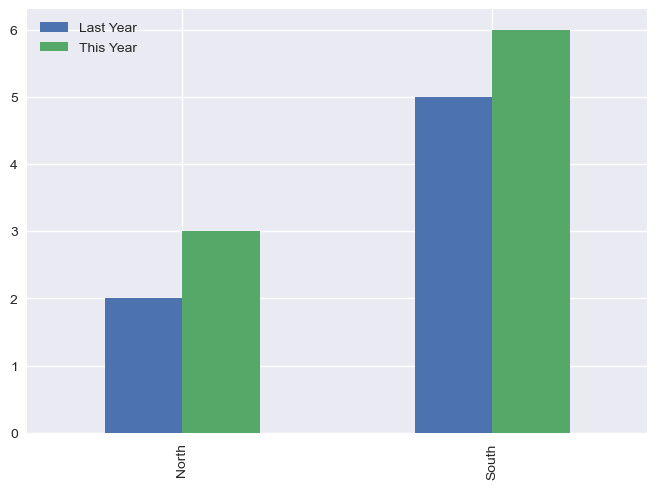

In [50]:
# pandas的plot方法会返回一个axis对象，可以从中获得图片。T会将DataFrame转置以调整图像方向
ax = df.T.plot.bar()
fig = ax.get_figure()

In [51]:
# 将图像发送至Excel
plot = sheet1.pictures.add(fig, name="SalesPlot", 
                           top=sheet1["H19"].top, 
                           left=sheet1["H19"].left)
# 将图像缩小为70%大小
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

要想使用新的图像来更新图片，只需调用update方法并传递另一个figure对象即可。虽然这样做会替换Excel中的图片，但会保留位置、尺寸、名称等属性：

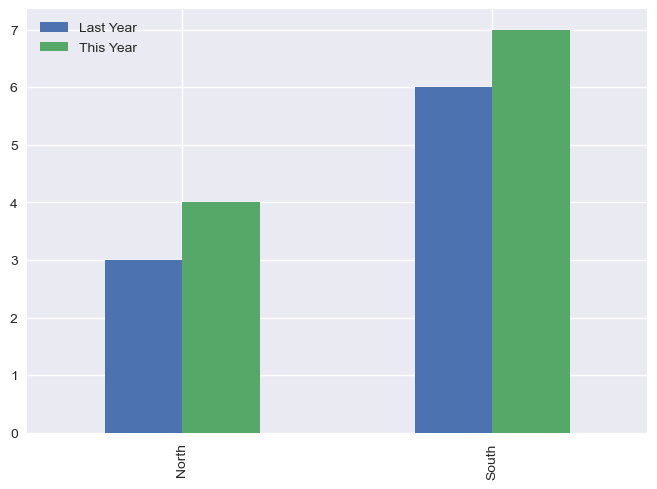

In [52]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [53]:
#### 3. 已定义名称

In [54]:
# 默认作用域时工作簿作用域
sheet1["A1:B2"].name = "matrix1"

In [55]:
# 对于工作表作用域，需要在工作表名称前加上一个感叹号
sheet1["B10:E11"].name = "Sheet1!matrix2"

In [56]:
# 现在可通过名称访问区域了
sheet1["matrix1"]

<Range [Book2.xlsx]Sheet1!$A$1:$B$2>

In [57]:
# 如果通过sheet1对象访问名称集合，则其中只包含工作表作用域的名称
sheet1.names

[<Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [58]:
# 如果通过book对象访问名称集合，则其中包含了工作簿和工作表作用域的所有名称
book.names

[<Name 'matrix1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [59]:
# 名称有多种方法和属性，例如，可以获取对应的range对象
book.names["matrix1"].refers_to_range

<Range [Book2.xlsx]Sheet1!$A$1:$B$2>

In [60]:
# 如果想为常量或公式取名，可使用add方法
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

In [61]:
# 添加新的工作表，写入150个值以便有事可做
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [62]:
%%time
# 这段代码进行了150次跨应用程序调用
for cell in sheet2["A1:E30"]:
    cell.value += 1

CPU times: total: 62.5 ms
Wall time: 314 ms


In [63]:
%%time
# 这里只进行了两次跨应用程序调用
values = sheet2["A1:E30"].options(np.array).value
sheet2["A1:E30"].value = values + 1

CPU times: total: 15.6 ms
Wall time: 30.5 ms


In [64]:
# 使用原始值时必须提供完整的目标区域，sheet["35"]就不再可用了
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]